<a href="https://colab.research.google.com/github/sewasewT7/Supervised-ML-Project/blob/main/Car_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imporing the dependencies

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso
from sklearn import metrics

load data

In [4]:
car_price_data = pd.read_csv('/content/car data.csv')

In [5]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_price_data.shape

(301, 9)

In [7]:
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_price_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
car_price_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
#cheking the distribution of catagorical data
print(car_price_data.Fuel_Type.value_counts())
print(car_price_data.Seller_Type.value_counts())
print(car_price_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [11]:
#encoding the catagorical data
car_price_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_price_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_price_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


<ipython-input-11-351ff081c34d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-11-351ff081c34d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_price_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-11-351ff081c34d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=

In [14]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
#splitting training data From test data
X = car_price_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_price_data['Selling_Price']

In [17]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
correlation = X.corr()
print(correlation)

                   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
Year           1.000000      -0.047584   -0.524342   0.053643    -0.039896   
Present_Price -0.047584       1.000000    0.203647   0.440415    -0.512030   
Kms_Driven    -0.524342       0.203647    1.000000   0.166801    -0.101419   
Fuel_Type      0.053643       0.440415    0.166801   1.000000    -0.352415   
Seller_Type   -0.039896      -0.512030   -0.101419  -0.352415     1.000000   
Transmission  -0.000394       0.348715    0.162510   0.080466    -0.063240   
Owner         -0.182104       0.008057    0.089216  -0.055705     0.124269   

               Transmission     Owner  
Year              -0.000394 -0.182104  
Present_Price      0.348715  0.008057  
Kms_Driven         0.162510  0.089216  
Fuel_Type          0.080466 -0.055705  
Seller_Type       -0.063240  0.124269  
Transmission       1.000000  0.050316  
Owner              0.050316  1.000000  


<Axes: >

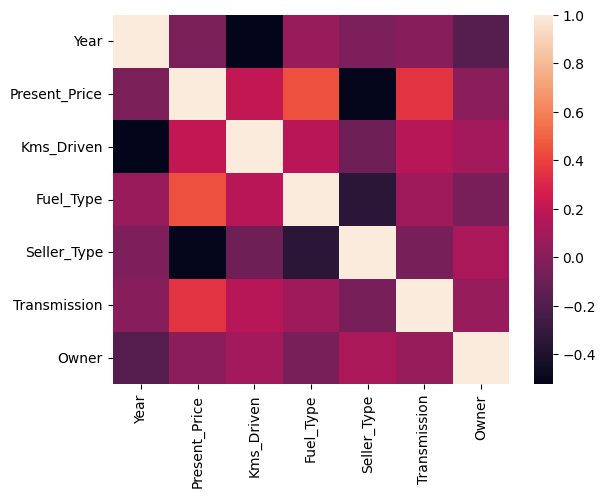

In [21]:
sns.heatmap(correlation,xticklabels=True,yticklabels=True)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [24]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [26]:
lin_reg_predict=lin_reg_model.predict(X_train)
print(lin_reg_predict)

[ 6.78487861e+00  1.03052148e+00  4.33053370e+00  2.19376150e-02
  3.57946207e+00  2.79503372e+00  1.43719894e+00  4.14889545e-01
  1.61166418e+00  1.12839641e+00  4.32086309e+00  6.17477452e+00
  9.29097627e-01  7.35592155e-01  6.15378778e+00  3.42694561e+00
  2.32984882e+00  7.50014006e+00  4.61811711e+00  4.43437311e+00
  4.45915634e+00  2.73352428e+00  4.44377264e+00  1.71378422e+00
  2.49318608e-01  3.94331375e+00  1.37445456e+00  4.61754769e+00
  1.38595068e+00  7.35605367e+00  7.24473016e+00  6.54331682e+00
  2.29055849e+00  2.19058216e+01  2.19873970e+00  5.64492151e+00
  2.82714047e+00  7.68311323e+00  5.67039850e+00  1.00273475e+01
  1.99828812e+00  2.37716894e+00  1.22731322e+00  2.40303328e+00
  9.94390646e+00  2.01662591e+00 -6.42391420e-01  5.42943934e+00
  1.14107420e+01 -5.10458803e-03  1.09479248e+00  1.61329534e+00
  5.38687939e+00  1.36601921e+00  7.71862076e+00  1.84430864e+01
  2.49779943e+00  1.56000342e-01  1.81959532e+00  9.31246211e+00
  3.96558814e+00  7.02797

In [27]:
error_score = metrics.r2_score(Y_train, lin_reg_predict)
print("R squared error : ", error_score)

R squared error :  0.8838169193709796


In [28]:
lin_reg_model.fit(X_test,Y_test)

LinearRegression()

In [31]:
lin_reg_pediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, lin_reg_pediction)
print("R squared error : ", error_score)

R squared error :  0.8793810279522549


In [32]:
lasso_model = Lasso()
lasso_model.fit(X_train,Y_train)

Lasso()

In [33]:
Lasso_prediction = lasso_model.predict(X_train)
error_score = metrics.r2_score(Y_train,Lasso_prediction)
print("R squared error : ", error_score)

R squared error :  0.843587395258283


In [34]:
lasso_model.fit(X_test,Y_test)


Lasso()

In [36]:
lasso_prediction = lasso_model.predict(X_test)
error_score = metrics.r2_score(Y_test,lasso_prediction)
print("R squared error : ", error_score)

R squared error :  0.8535217610784069


ValueError: x and y must be the same size

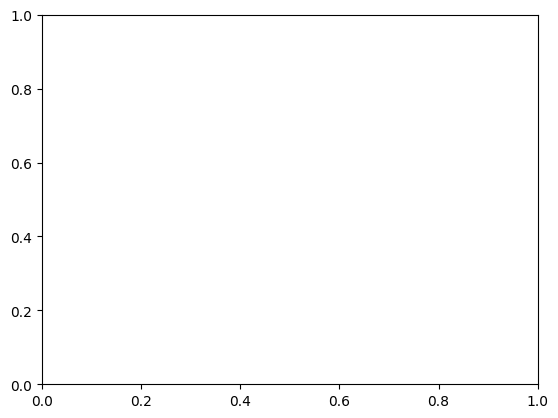

In [40]:
plt.scatter(Y_train,lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

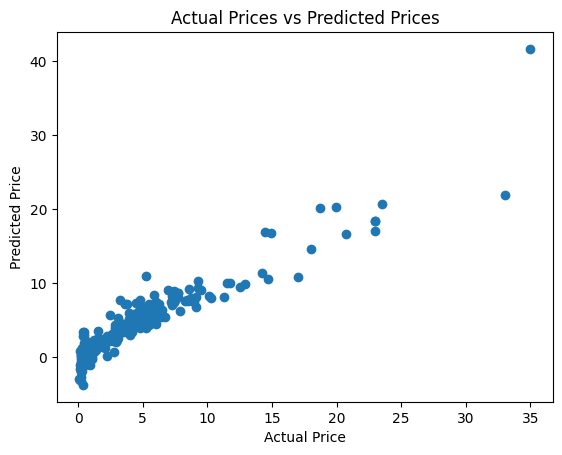

In [39]:
plt.scatter(Y_train,lin_reg_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()